<a href="https://colab.research.google.com/github/ATHIRASARATH401/ict/blob/main/train_loan_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/train_loan_preprocess.csv')



In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.shape

(614, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


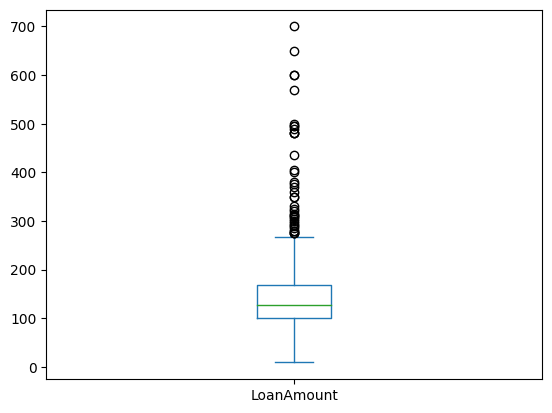

In [ ]:

df['LoanAmount'].plot(kind='box')
plt.show()

In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,489
Female,112


In [40]:
df['Married'].value_counts()

,count
Married,
Yes,398
No,213


In [44]:
df['Self_Employed'].value_counts()

,count
Self_Employed,
No,500
Yes,82


In [51]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Married'] = df['Married'].map({'No': 0, 'Yes': 1})
df['Education'] = df['Education'].map({'Not Graduate': 0, 'Graduate': 1})
df['Self_Employed'] = df['Self_Employed'].map({'No': 0, 'Yes': 1})
df['Property_Area'] = df['Property_Area'].map({'Rural': 0, 'Semiurban': 1, 'Urban': 2})
df['Loan_Status'] = df['Loan_Status'].map({'N': 0, 'Y': 1})

In [52]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Self_Employed_Numeric
0,LP001002,NaN,NaN,0.0,NaN,NaN,5849,0.0,128.0,360.0,1.0,NaN,NaN,0.0
1,LP001003,NaN,NaN,1.0,NaN,NaN,4583,1508.0,128.0,360.0,1.0,NaN,NaN,0.0
2,LP001005,NaN,NaN,0.0,NaN,NaN,3000,0.0,66.0,360.0,1.0,NaN,NaN,1.0
3,LP001006,NaN,NaN,0.0,NaN,NaN,2583,2358.0,120.0,360.0,1.0,NaN,NaN,0.0
4,LP001008,NaN,NaN,0.0,NaN,NaN,6000,0.0,141.0,360.0,1.0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,NaN,NaN,0.0,NaN,NaN,2900,0.0,71.0,360.0,1.0,NaN,NaN,0.0
610,LP002979,NaN,NaN,NaN,NaN,NaN,4106,0.0,40.0,180.0,1.0,NaN,NaN,0.0
611,LP002983,NaN,NaN,1.0,NaN,NaN,8072,240.0,253.0,360.0,1.0,NaN,NaN,0.0
612,LP002984,NaN,NaN,2.0,NaN,NaN,7583,0.0,187.0,360.0,1.0,NaN,NaN,0.0


In [56]:

from sklearn.preprocessing import StandardScaler

numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Self_Employed_Numeric
0,LP001002,NaN,NaN,0.0,NaN,NaN,0.072991,-0.554487,-0.211241,0.276642,1.0,NaN,NaN,0.0
1,LP001003,NaN,NaN,1.0,NaN,NaN,-0.134412,-0.038732,-0.211241,0.276642,1.0,NaN,NaN,0.0
2,LP001005,NaN,NaN,0.0,NaN,NaN,-0.393747,-0.554487,-0.948996,0.276642,1.0,NaN,NaN,1.0
3,LP001006,NaN,NaN,0.0,NaN,NaN,-0.462062,0.251980,-0.306435,0.276642,1.0,NaN,NaN,0.0
4,LP001008,NaN,NaN,0.0,NaN,NaN,0.097728,-0.554487,-0.056551,0.276642,1.0,NaN,NaN,0.0


In [58]:

def handle_outliers_iqr(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df[column] = np.clip(df[column], lower_bound, upper_bound)
  return df

for col in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']:
  df = handle_outliers_iqr(df, col)

In [62]:

feature_cols = df.columns

In [63]:
feature_cols

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Self_Employed_Numeric'],
      dtype='object')

In [64]:
import numpy as np

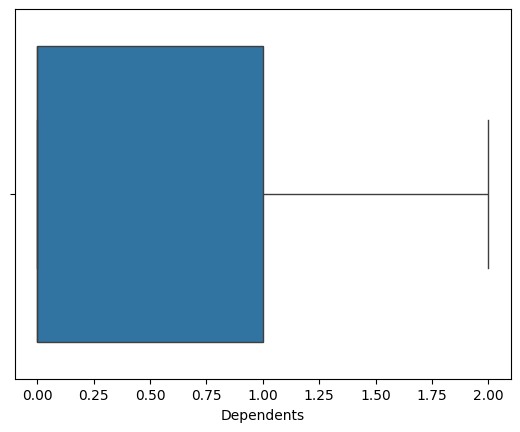

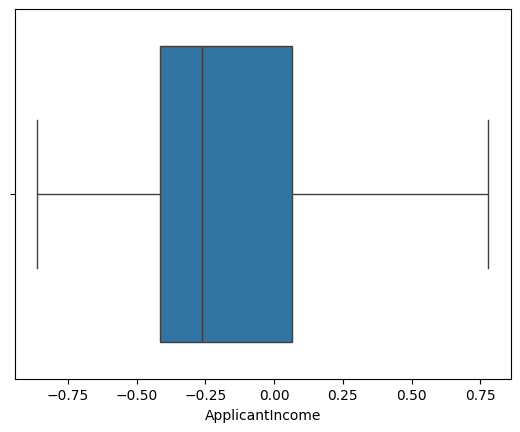

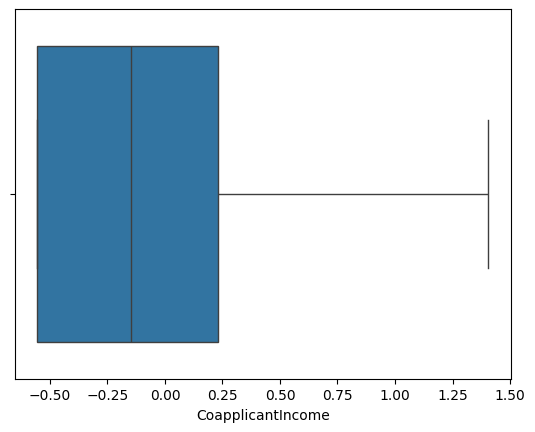

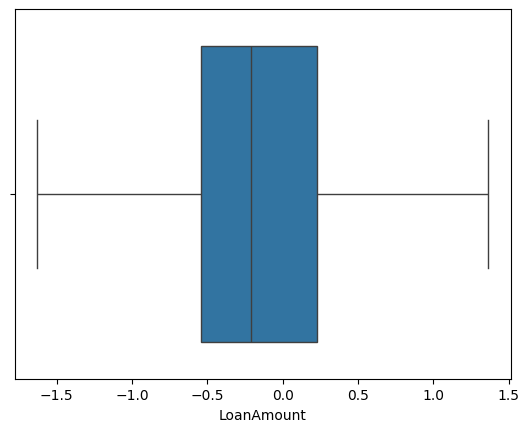

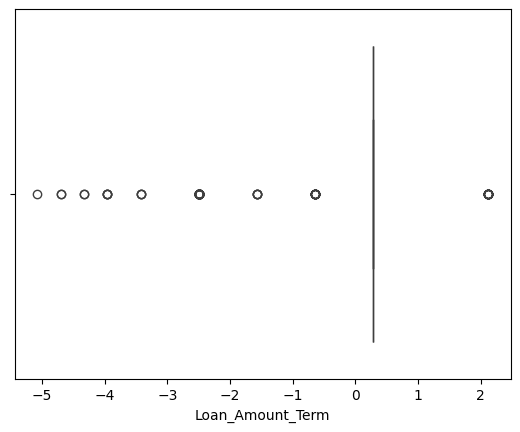

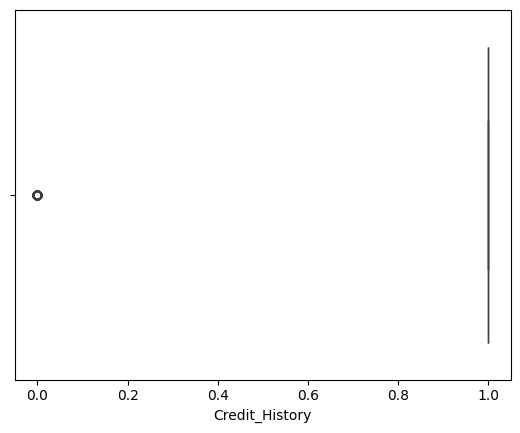

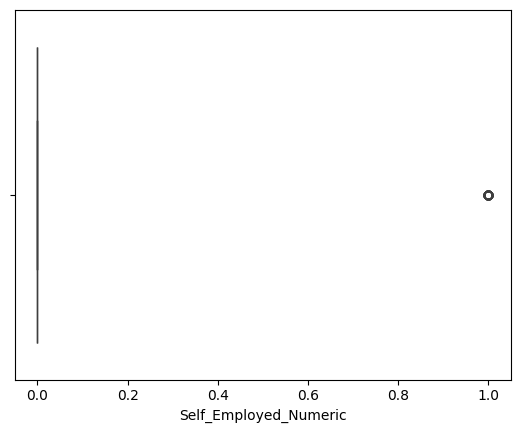

In [68]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

for col in df.columns:
    if df[col].dtype != 'object' and len(df[col].unique()) > 1: # Check if column is numeric and has more than one unique value
        Q1 = np.percentile(df[col], 25, method ='midpoint')
        Q2 = np.percentile(df[col], 50, method ='midpoint')
        Q3 = np.percentile(df[col], 75, method ='midpoint')
        IQR = Q3-Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        df[col]= df[col].clip(lower_limit,upper_limit)

        # Create boxplot only for suitable columns
        sns.boxplot(x=df[col])
        plt.show()

In [72]:
df = pd.get_dummies(df, columns=['Credit_History'], prefix=['Credit_History'])
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status,Self_Employed_Numeric,Credit_History_0.0,Credit_History_1.0
0,LP001002,Unknown,Unknown,0.0,NaN,Unknown,0.569530,0.000000,0.473161,0.74359,NaN,NaN,0.0,False,True
1,LP001003,Unknown,Unknown,1.0,NaN,Unknown,0.443012,0.263119,0.473161,0.74359,NaN,NaN,0.0,False,True
2,LP001005,Unknown,Unknown,0.0,NaN,Unknown,0.284815,0.000000,0.226640,0.74359,NaN,NaN,1.0,False,True
3,LP001006,Unknown,Unknown,0.0,NaN,Unknown,0.243142,0.411429,0.441352,0.74359,NaN,NaN,0.0,False,True
4,LP001008,Unknown,Unknown,0.0,NaN,Unknown,0.584620,0.000000,0.524851,0.74359,NaN,NaN,0.0,False,True
